In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("data/processed_steam.csv")

In [3]:
df.head()

,appid,name,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,platforms_windows,platforms_mac,platforms_linux,categories_mod,categories_vr_support,categories_multiplayer,categories_in_app_purchase,categories_co_op,categories_controller_support,categories_singleplayer,genres_massively_multiplayer,genres_racing,genres_sport,genres_free_to_play,genres_early_access,genres_rpg,genres_simulation,genres_strategy,genres_adventure,genres_casual,genres_action,genres_indie,min_owners,max_owners,approx_owners,min_total_playtime,max_total_playtime,approx_total_playtime,min_revenue,max_revenue,approx_revenue,release_day,release_month,release_year
0,10,Counter-Strike,1,Valve,Valve,0,0,124534,3339,17612,317,7.19,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10000000,20000000,15000000.0,176120000000,352240000000,2.641800e+11,71900000.0,143800000.0,107850000.0,1,11,2000
1,20,Team Fortress Classic,1,Valve,Valve,0,0,3318,633,277,62,3.99,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5000000,10000000,7500000.0,1385000000,2770000000,2.077500e+09,19950000.0,39900000.0,29925000.0,1,4,1999
2,30,Day of Defeat,1,Valve,Valve,0,0,3416,398,187,34,3.99,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5000000,10000000,7500000.0,935000000,1870000000,1.402500e+09,19950000.0,39900000.0,29925000.0,1,5,2003
3,40,Deathmatch Classic,1,Valve,Valve,0,0,1273,267,258,184,3.99,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5000000,10000000,7500000.0,1290000000,2580000000,1.935000e+09,19950000.0,39900000.0,29925000.0,1,6,2001
4,50,Half-Life: Opposing Force,1,Gearbox Software,Valve,0,0,5250,288,624,415,3.99,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5000000,10000000,7500000.0,3120000000,6240000000,4.680000e+09,19950000.0,39900000.0,29925000.0,1,11,1999


### Game titles
Some visualization of the top 10 game titles

In [4]:
titles_count = 10

#### 1. By owners

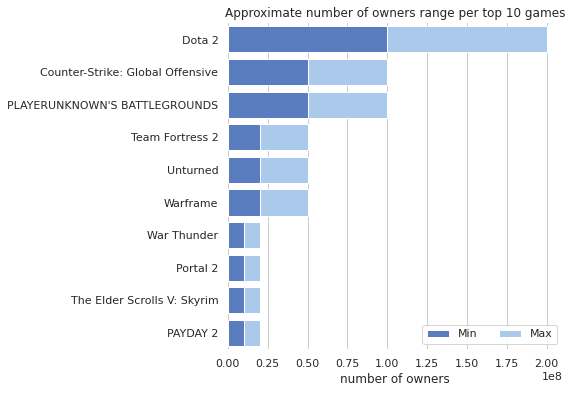

In [5]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6,6))

# Sort the dataset in descending order of the number of owners and extract top games
df_sorted_owners = df.sort_values("min_owners", ascending=False).head(titles_count)

# Plot the maximum number of owners
sns.set_color_codes("pastel")
sns.barplot(x="max_owners", y="name", data=df_sorted_owners,
            label="Max", color="b")

# Plot the minimum number of owners
sns.set_color_codes("muted")
sns.barplot(x="min_owners", y="name", data=df_sorted_owners,
            label="Min", color="b")

# Add a legend and informative axis label
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=2, loc="lower right", frameon=True)
ax.set(
    xlabel="number of owners",
    ylabel="",
    title="Approximate number of owners range per top {} games".format(titles_count)
)
sns.despine(left=True, bottom=True)

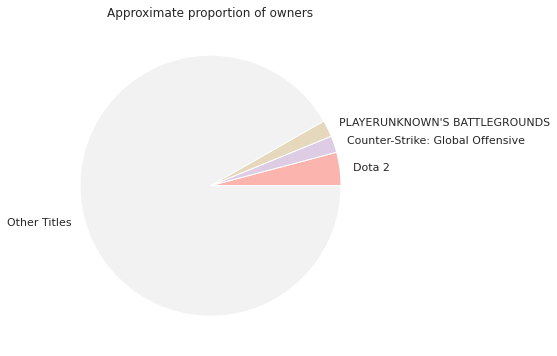

In [6]:
# Take the top 3 games
df_sorted_owners = df_sorted_owners.head(3)
df_sorted_owners.index = df_sorted_owners["name"]

# Append the total owners of other titles as a row
df_sorted_owners.loc["Other Titles", "approx_owners"] = df["approx_owners"].sum() - df_sorted_owners["approx_owners"].sum()

# Plot a pie chart for the approximate number of owners
df_sorted_owners.plot.pie(y="approx_owners", figsize=(6, 6), colormap="Pastel1",
                          ylabel="", title="Approximate proportion of owners")

# Remove the legend
plt.legend().set_visible(False)

#### 2. By total playtime

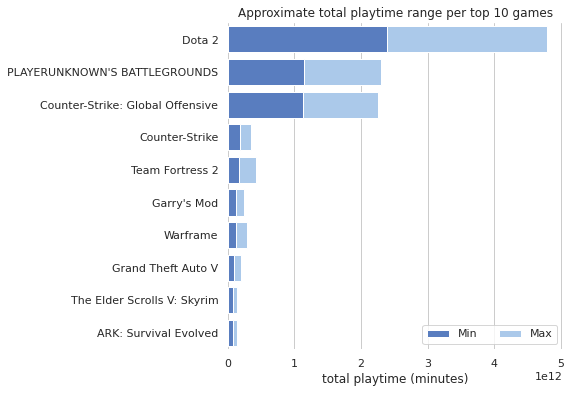

In [7]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6,6))

# Sort the dataset in descending order of the total play time and extract top games
df_sorted_total_playtime = df.sort_values("min_total_playtime", ascending=False).head(titles_count)

# Plot the maximum total play time
sns.set_color_codes("pastel")
sns.barplot(x="max_total_playtime", y="name", data=df_sorted_total_playtime,
            label="Max", color="b")

# Plot the minimum total play time
sns.set_color_codes("muted")
sns.barplot(x="min_total_playtime", y="name", data=df_sorted_total_playtime,
            label="Min", color="b")

# Add a legend and informative axis label
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=2, loc="lower right", frameon=True)
ax.set(
    xlabel="total playtime (minutes)",
    ylabel="",
    title="Approximate total playtime range per top {} games".format(titles_count)
)
sns.despine(left=True, bottom=True)

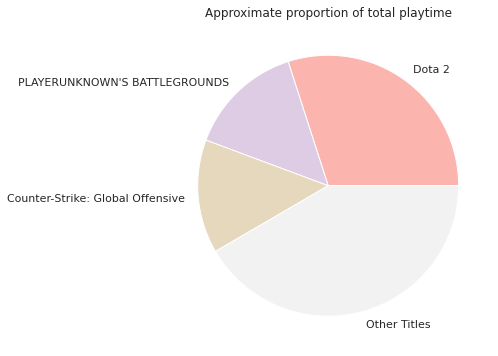

In [8]:
# Take the top 3 games
df_sorted_total_playtime = df_sorted_total_playtime.head(3)
df_sorted_total_playtime.index = df_sorted_total_playtime["name"]

# Append the total play time of other titles as a row
df_sorted_total_playtime.loc["Other Titles", "approx_total_playtime"] = \
    df["approx_total_playtime"].sum() - df_sorted_total_playtime["approx_total_playtime"].sum()

# Plot a pie chart for the approximate total play time
df_sorted_total_playtime.plot.pie(y="approx_total_playtime", figsize=(6, 6), colormap="Pastel1",
                                  ylabel="", title="Approximate proportion of total playtime")

# Remove the legend
plt.legend().set_visible(False)

# Save figure
plt.savefig("graph/ApproximateProportionOfTotalPlaytime.jpg", bbox_inches='tight')

In [9]:
df = df[~df["name"].isin(["Dota 2", "PLAYERUNKNOWN'S BATTLEGROUNDS", "Counter-Strike: Global Offensive"])]

### Game genres
Some visualization of the top 10 game genres

In [10]:
genres_list = ["massively_multiplayer", "racing", "sport", "rpg", "simulation", "strategy", "adventure", "casual", "action", "indie"]
target_columns = ["min_owners", "approx_owners", "max_owners", "min_total_playtime", "approx_total_playtime", "max_total_playtime"]

In [11]:
df_genres = pd.DataFrame(columns=target_columns + ["count"])

In [12]:
# Let's fill out this data frame
for genre in genres_list:
    df_genres.loc[genre] = df[target_columns].loc[df["genres_" + genre] == 1].sum()
    df_genres.loc[genre, "count"] = df["genres_" + genre].loc[df["genres_" + genre] == 1].sum()
df_genres["name"] = df_genres.index
df_genres

,min_owners,approx_owners,max_owners,min_total_playtime,approx_total_playtime,max_total_playtime,count,name
massively_multiplayer,2.341300e+08,3.712500e+08,5.083700e+08,5.931116e+11,9.160294e+11,1.238947e+12,722.0,massively_multiplayer
racing,4.954000e+07,8.630000e+07,1.230600e+08,5.951311e+10,9.257248e+10,1.256318e+11,1024.0,racing
sport,5.869000e+07,1.040200e+08,1.493500e+08,9.629444e+10,1.487734e+11,2.012524e+11,1322.0,sport
rpg,4.213300e+08,6.968650e+08,9.724000e+08,8.884582e+11,1.385903e+12,1.883348e+12,4311.0,rpg
simulation,3.055800e+08,5.259500e+08,7.463200e+08,6.315486e+11,9.951713e+11,1.358794e+12,5194.0,simulation
strategy,3.650100e+08,6.180500e+08,8.710900e+08,4.931820e+11,7.904671e+11,1.087752e+12,5246.0,strategy
adventure,5.965100e+08,1.026745e+09,1.456980e+09,8.901833e+11,1.399842e+12,1.909501e+12,10031.0,adventure
casual,2.884100e+08,5.468300e+08,8.052500e+08,2.935896e+11,4.757689e+11,6.579482e+11,10210.0,casual
action,1.242770e+09,2.061690e+09,2.880610e+09,2.136001e+12,3.397802e+12,4.659604e+12,11900.0,action
indie,8.184900e+08,1.457960e+09,2.097430e+09,1.067095e+12,1.681894e+12,2.296694e+12,19421.0,indie


#### 1. By number of games

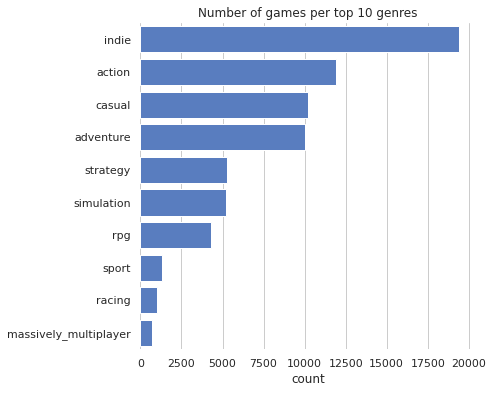

In [13]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6,6))

# Sort the dataset in descending order of the number of games
df_genres_sorted_games = df_genres.sort_values("count", ascending=False)

# Plot the number of games
sns.set_color_codes("muted")
sns.barplot(x="count", y="name", data=df_genres_sorted_games, color="b")

# Add a legend and informative axis label
handles, labels = ax.get_legend_handles_labels()
ax.set(
    title="Number of games per top 10 genres",
    xlabel="count",
    ylabel=""
)
sns.despine(left=True, bottom=True)

# Save figure
plt.savefig("graph/NumberOfGamesPerTop10Genres.jpg", bbox_inches='tight')

#### 2. By owners

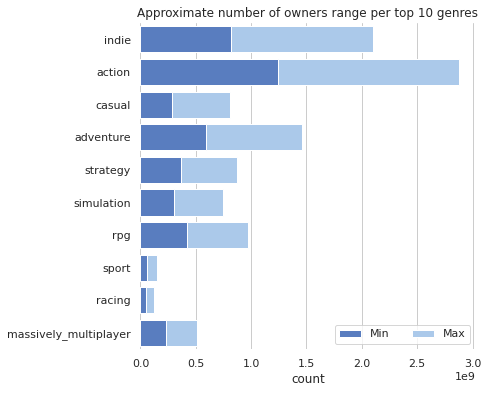

In [14]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6,6))

# Plot the maximum number of owners
sns.set_color_codes("pastel")
sns.barplot(x="max_owners", y="name", data=df_genres_sorted_games,
            label="Max", color="b")

# Plot the minimum number of owners
sns.set_color_codes("muted")
sns.barplot(x="min_owners", y="name", data=df_genres_sorted_games,
            label="Min", color="b")

# Add a legend and informative axis label
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=2, loc="lower right", frameon=True)
ax.set(
    xlabel="count",
    ylabel="",
    title="Approximate number of owners range per top 10 genres"
)
sns.despine(left=True, bottom=True)

#### 3. By total playtime

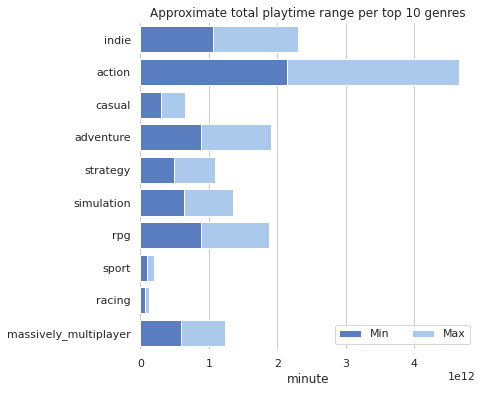

In [15]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6,6))

# Plot the maximum total play time
sns.set_color_codes("pastel")
sns.barplot(x="max_total_playtime", y="name", data=df_genres_sorted_games,
            label="Max", color="b")

# Plot the minimum total play time
sns.set_color_codes("muted")
sns.barplot(x="min_total_playtime", y="name", data=df_genres_sorted_games,
            label="Min", color="b")

# Add a legend and informative axis label
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=2, loc="lower right", frameon=True)
ax.set(
    xlabel="minute",
    ylabel="",
    title="Approximate total playtime range per top 10 genres"
)
sns.despine(left=True, bottom=True)

# Save figure
plt.savefig("graph/ApproximateTotalPlaytimeRangePerTop10Genres.jpg", bbox_inches='tight')

### Game categories
Some visualization of the game categories (singleplayer, multiplayer, co-op, controller support and VR support)

In [16]:
categories_list = ["singleplayer", "multiplayer", "co_op", "controller_support", "vr_support"]
target_columns = ["min_owners", "approx_owners", "max_owners", "min_total_playtime", "approx_total_playtime", "max_total_playtime"]

In [17]:
df_categories = pd.DataFrame(columns=target_columns + ["count"])

In [18]:
# Let's fill out this data frame
for category in categories_list:
    df_categories.loc[category] = df[target_columns].loc[df["categories_" + category] == 1].sum()
    df_categories.loc[category, "count"] = df["categories_" + category].loc[df["categories_" + category] == 1].sum()
df_categories["name"] = df_categories.index
df_categories

,min_owners,approx_owners,max_owners,min_total_playtime,approx_total_playtime,max_total_playtime,count,name
singleplayer,1.597210e+09,2.734775e+09,3.872340e+09,2.211132e+12,3.499241e+12,4.787351e+12,25678.0,singleplayer
multiplayer,1.054360e+09,1.706615e+09,2.358870e+09,2.373249e+12,3.756942e+12,5.140634e+12,5401.0,multiplayer
co_op,6.295300e+08,1.027710e+09,1.425890e+09,1.406529e+12,2.229650e+12,3.052771e+12,3721.0,co_op
controller_support,9.866000e+08,1.644445e+09,2.302290e+09,1.656039e+12,2.643775e+12,3.631512e+12,9913.0,controller_support
vr_support,5.185000e+07,8.708500e+07,1.223200e+08,1.959480e+11,3.174405e+11,4.389330e+11,253.0,vr_support


#### 1. By number of games

[Text(0.5, 1.0, 'Number of games per categories'),
 Text(0.5, 0, 'count'),
 Text(0, 0.5, '')]

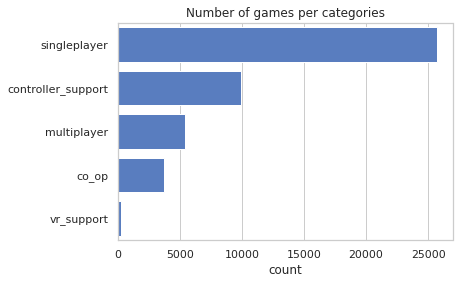

In [19]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6,4))

# Sort the dataset in descending order of the number of games
df_categories_sorted_games = df_categories.sort_values("count", ascending=False)

# Plot the number of games
sns.set_color_codes("muted")
sns.barplot(x="count", y="name", data=df_categories_sorted_games, color="b")

# Add a legend and informative axis label
handles, labels = ax.get_legend_handles_labels()
ax.set(
    title="Number of games per categories",
    xlabel="count",
    ylabel=""
)

#### 2. By owners

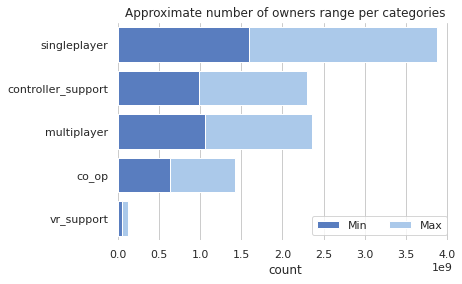

In [20]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6,4))

# Plot the maximum number of owners
sns.set_color_codes("pastel")
sns.barplot(x="max_owners", y="name", data=df_categories_sorted_games,
            label="Max", color="b")

# Plot the minimum number of owners
sns.set_color_codes("muted")
sns.barplot(x="min_owners", y="name", data=df_categories_sorted_games,
            label="Min", color="b")

# Add a legend and informative axis label
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=2, loc="lower right", frameon=True)
ax.set(
    xlabel="count",
    ylabel="",
    title="Approximate number of owners range per categories"
)
sns.despine(left=True, bottom=True)

#### 3. By total playtime

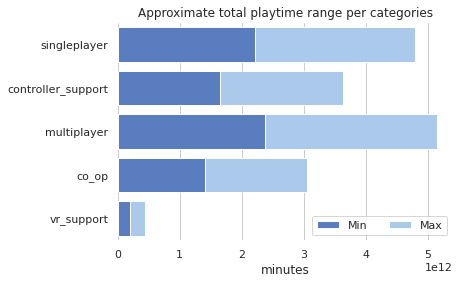

In [21]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6,4))

# Plot the maximum total play time
sns.set_color_codes("pastel")
sns.barplot(x="max_total_playtime", y="name", data=df_categories_sorted_games,
            label="Max", color="b")

# Plot the minimum total play time
sns.set_color_codes("muted")
sns.barplot(x="min_total_playtime", y="name", data=df_categories_sorted_games,
            label="Min", color="b")

# Add a legend and informative axis label
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=2, loc="lower right", frameon=True)
ax.set(
    xlabel="minutes",
    ylabel="",
    title="Approximate total playtime range per categories"
)
sns.despine(left=True, bottom=True)

### Free-to-play and In-app purchase?

In [22]:
df["free_to_play_with_in_app_purchase"] = df["genres_free_to_play"] & df["categories_in_app_purchase"]
free_to_play_with_in_app_purchase = df["free_to_play_with_in_app_purchase"].sum()
free_to_play_with_in_app_purchase

460

In [23]:
df["free_to_play_without_in_app_purchase"] = df["genres_free_to_play"] & (1 - df["categories_in_app_purchase"])
free_to_play_without_in_app_purchase = df["free_to_play_without_in_app_purchase"].sum()
free_to_play_without_in_app_purchase

1242

In [24]:
df["not_free_to_play_with_in_app_purchase"] = (1 - df["genres_free_to_play"]) & df["categories_in_app_purchase"]
not_free_to_play_with_in_app_purchase = df["not_free_to_play_with_in_app_purchase"].sum()
not_free_to_play_with_in_app_purchase

228

In [25]:
df["not_free_to_play_without_in_app_purchase"] = (1 - df["genres_free_to_play"]) & (1 - df["categories_in_app_purchase"])
not_free_to_play_without_in_app_purchase = df["not_free_to_play_without_in_app_purchase"].sum()
not_free_to_play_without_in_app_purchase

25142

#### 1. By number of games

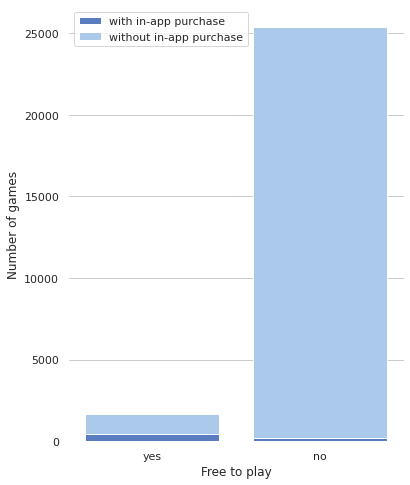

In [26]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6,8))

# Plot the number of games
sns.set_color_codes("pastel")
sns.barplot(y=[df["genres_free_to_play"].sum(), (1 - df["genres_free_to_play"]).sum()], 
            x=["yes", "no"], label="without in-app purchase", color="b")

# Plot the number of games with in-app purchase
sns.set_color_codes("muted")
sns.barplot(y=[free_to_play_with_in_app_purchase, not_free_to_play_with_in_app_purchase], 
            x=["yes", "no"], label="with in-app purchase", color="b")

# Add a legend and informative axis label
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=1, loc="upper left", frameon=True)
ax.set(
    xlabel="Free to play",
    ylabel="Number of games"
)
sns.despine(left=True, bottom=True)

# Save figure
plt.savefig("graph/NumberOfGames.jpg", bbox_inches='tight')

#### 2. By play time

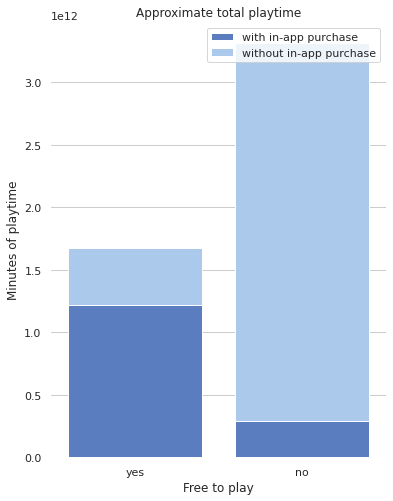

In [27]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6,8))

# Plot the number of games
sns.set_color_codes("pastel")
sns.barplot(y=[
                df["approx_total_playtime"].loc[df["genres_free_to_play"] == 1].sum(), 
                df["approx_total_playtime"].loc[df["genres_free_to_play"] == 0].sum()
            ], 
            x=["yes", "no"], label="without in-app purchase", color="b")

# Plot the number of games with in-app purchase
sns.set_color_codes("muted")
sns.barplot(y=[
                df["approx_total_playtime"].loc[df["free_to_play_with_in_app_purchase"] == 1].sum(), 
                df["approx_total_playtime"].loc[df["not_free_to_play_with_in_app_purchase"] == 1].sum()
            ],
            x=["yes", "no"], label="with in-app purchase", color="b")

# Add a legend and informative axis label
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=1, loc="upper right", frameon=True)
ax.set(
    xlabel="Free to play",
    ylabel="Minutes of playtime",
    title="Approximate total playtime"
)
sns.despine(left=True, bottom=True)

# Save figure
plt.savefig("graph/ApproximateTotalPlaytime.jpg", bbox_inches='tight')